# Predict Cryptocurrency Prices With Machine Learning #

In [1]:
import numpy as np # working with data
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import utilities

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Step 1 Load & Process Data

In [5]:
currency = "BTC"

currency_data = utilities.get_dataset(currency=currency)
print(currency_data)
    
currency_close_price = currency_data.close.values.astype('float32')
currency_close_price = currency_close_price.reshape(len(currency_close_price), 1)

            Date      Open      High       Low     close        Volume  \
0     2013-04-28    135.30    135.98    132.10    134.21             -   
1     2013-04-29    134.44    147.49    134.00    144.54             -   
2     2013-04-30    144.00    146.93    134.05    139.00             -   
3     2013-05-01    139.00    139.89    107.72    116.99             -   
4     2013-05-02    116.38    125.60     92.28    105.21             -   
5     2013-05-03    106.25    108.13     79.10     97.75             -   
6     2013-05-04     98.10    115.00     92.50    112.50             -   
7     2013-05-05    112.90    118.80    107.14    115.91             -   
8     2013-05-06    115.98    124.66    106.64    112.30             -   
9     2013-05-07    112.25    113.44     97.70    111.50             -   
10    2013-05-08    109.60    115.78    109.60    113.57             -   
11    2013-05-09    113.20    113.46    109.26    112.67             -   
12    2013-05-10    112.80    122.00  

AttributeError: 'DataFrame' object has no attribute 'close'

In [3]:
def create_datasets(dataset, sequence_length):
    sequence_length += 1
    seq_dataset = []
    for i in range(len(dataset) - sequence_length):
        seq_dataset.append(dataset[i: i + sequence_length])

    seq_dataset = np.array(seq_dataset)
    
    data_x = seq_dataset[:, :-1]
    data_y = seq_dataset[:, -1]
        
    return data_x, data_y

scaler = MinMaxScaler(feature_range=(0, 1))
currency_close_price_scaled = scaler.fit_transform(currency_close_price)

train_size = int(len(currency_close_price_scaled) * 0.85)
test_size = len(currency_close_price_scaled) - train_size
train, test = currency_close_price_scaled[0:train_size,:], currency_close_price_scaled[train_size:len(currency_close_price_scaled),:]

look_back = 10

x_train, y_train = create_datasets(train, look_back)
x_test, y_test = create_datasets(test, look_back)


### Step 2 Build Model

In [5]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.35))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.35))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

/Users/oscaralsing/Documents/Programming/Predict-Cryptocurrency-Price-With-Machine-Learning/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/Users/oscaralsing/Documents/Programming/Predict-Cryptocurrency-Price-With-Machine-Learning/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  
/Users/oscaralsing/Documents/Programming/Predict-Cryptocurrency-Price-With-Machine-Learning/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [6]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=2, validation_split=0.2)

Train on 1071 samples, validate on 268 samples
Epoch 1/30
 - 3s - loss: 1.6140e-04 - val_loss: 6.6350e-04
Epoch 2/30
 - 0s - loss: 1.0804e-04 - val_loss: 2.9724e-04
Epoch 3/30
 - 1s - loss: 6.7818e-05 - val_loss: 1.1744e-04
Epoch 4/30
 - 0s - loss: 5.7910e-05 - val_loss: 4.1556e-04
Epoch 5/30
 - 1s - loss: 5.0821e-05 - val_loss: 1.6525e-05
Epoch 6/30
 - 0s - loss: 4.9454e-05 - val_loss: 1.7037e-04
Epoch 7/30
 - 1s - loss: 4.8203e-05 - val_loss: 9.0006e-05
Epoch 8/30
 - 0s - loss: 3.3053e-05 - val_loss: 1.6491e-05
Epoch 9/30
 - 1s - loss: 4.4922e-05 - val_loss: 9.0375e-05
Epoch 10/30
 - 1s - loss: 3.0862e-05 - val_loss: 1.1797e-04
Epoch 11/30
 - 0s - loss: 2.9893e-05 - val_loss: 2.7473e-05
Epoch 12/30
 - 0s - loss: 3.4150e-05 - val_loss: 1.2605e-04
Epoch 13/30
 - 0s - loss: 2.8785e-05 - val_loss: 2.7569e-04
Epoch 14/30
 - 0s - loss: 2.8864e-05 - val_loss: 5.2401e-05
Epoch 15/30
 - 0s - loss: 2.9776e-05 - val_loss: 2.5411e-05
Epoch 16/30
 - 1s - loss: 2.5274e-05 - val_loss: 1.4512e-04
Ep

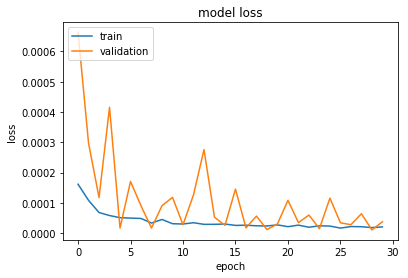

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Step 3 Predict

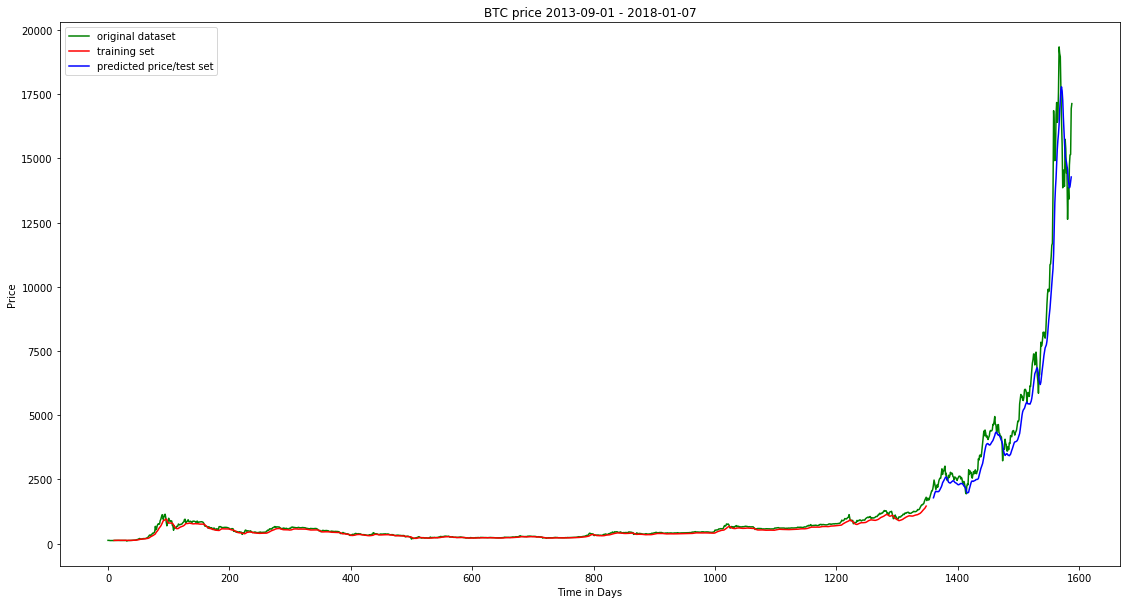

In [8]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict_unnorm = scaler.inverse_transform(train_predict)
test_predict_unnorm = scaler.inverse_transform(test_predict)

# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(currency_close_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_unnorm)+look_back, :] = train_predict_unnorm

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(currency_close_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_unnorm)+(look_back*2)+1:len(currency_close_price)-1, :] = test_predict_unnorm

plt.figure(figsize=(19, 10))
plt.plot(currency_close_price, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted price/test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('Price')

plt.title("%s price %s - % s" % (currency, 
                                 utilities.get_date_from_current(offset=len(currency_close_price)), 
                                 utilities.get_date_from_current(0)))

plt.show()
